In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, v_measure_score

In [78]:
datos = pd.read_csv('DatosFinales.csv')[['Fecha','Hora','Potencia [kW]']]
train_size = 40320
test_size = len(datos) - train_size
print(len(datos),train_size,test_size)

datos_train = datos[0:train_size]
datos_test = datos[train_size:len(datos)]

k1,k2,k3,k4 = 1,3,6,12
datos_train['K = 1'] = datos_train['Potencia [kW]'].shift(k1)
datos_train['K = 3'] = datos_train['Potencia [kW]'].shift(k2)
datos_train['K = 6'] = datos_train['Potencia [kW]'].shift(k3)
datos_train['K = 12'] = datos_train['Potencia [kW]'].shift(k4)
datos_train

54960 40320 14640


C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Fecha,Hora,Potencia [kW],K = 1,K = 3,K = 6,K = 12
0,1/10/2019,7:00,4.37,NaN,NaN,NaN,NaN
1,1/10/2019,7:05,5.71,4.37,NaN,NaN,NaN
2,1/10/2019,7:10,7.76,5.71,NaN,NaN,NaN
3,1/10/2019,7:15,11.23,7.76,4.37,NaN,NaN
4,1/10/2019,7:20,14.76,11.23,5.71,NaN,NaN
...,...,...,...,...,...,...,...
40315,31/08/2020,16:35,0.60,0.65,0.78,1.94,5.20
40316,31/08/2020,16:40,0.65,0.60,0.76,1.32,5.71
40317,31/08/2020,16:45,0.88,0.65,0.65,0.92,6.97
40318,31/08/2020,16:50,0.89,0.88,0.60,0.78,5.94


In [79]:
datos_test['K = 1'] = datos_test['Potencia [kW]'].shift(k1)
datos_test['K = 3'] = datos_test['Potencia [kW]'].shift(k2)
datos_test['K = 6'] = datos_test['Potencia [kW]'].shift(k3)
datos_test['K = 12'] = datos_test['Potencia [kW]'].shift(k4)
datos_test

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Fecha,Hora,Potencia [kW],K = 1,K = 3,K = 6,K = 12
40320,1/09/2020,7:00,4.66,NaN,NaN,NaN,NaN
40321,1/09/2020,7:05,5.23,4.66,NaN,NaN,NaN
40322,1/09/2020,7:10,5.94,5.23,NaN,NaN,NaN
40323,1/09/2020,7:15,6.86,5.94,4.66,NaN,NaN
40324,1/09/2020,7:20,8.28,6.86,5.23,NaN,NaN
...,...,...,...,...,...,...,...
54955,31/12/2020,16:35,0.10,0.22,0.29,0.36,0.24
54956,31/12/2020,16:40,0.05,0.10,0.31,0.28,0.50
54957,31/12/2020,16:45,0.10,0.05,0.22,0.20,0.52
54958,31/12/2020,16:50,0.18,0.10,0.10,0.29,0.41


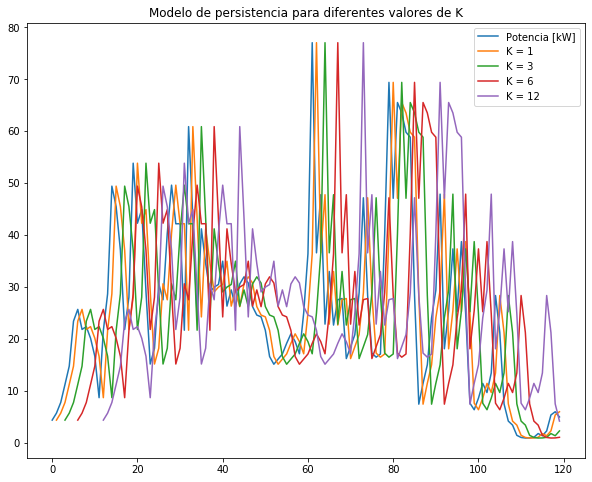

In [80]:
datos_train[0:120].plot(figsize=(10,8),title = 'Modelo de persistencia para diferentes valores de K')

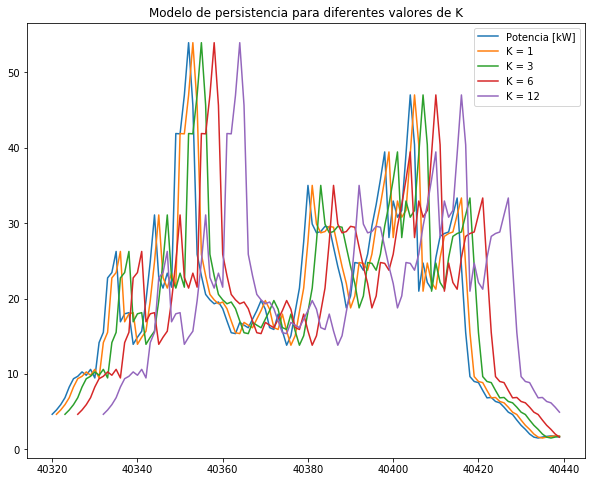

In [81]:
datos_test[0:120].plot(figsize=(10,8),title = 'Modelo de persistencia para diferentes valores de K')

In [83]:
error_train_1 = np.sqrt(mean_squared_error(datos_train['Potencia [kW]'][k1:],datos_train['K = 1'][k1:]))
error_train_3 = np.sqrt(mean_squared_error(datos_train['Potencia [kW]'][k2:],datos_train['K = 3'][k2:]))
error_train_6 = np.sqrt(mean_squared_error(datos_train['Potencia [kW]'][k3:],datos_train['K = 6'][k3:]))
error_train_12 = np.sqrt(mean_squared_error(datos_train['Potencia [kW]'][k4:],datos_train['K = 12'][k4:]))

In [93]:
print('El RMSE de entrenamiento de persistencia 1 es: ' ,error_train_1, '\n'
      'El RMSE de entrenamiento de persistencia 3 es: ' ,error_train_3, '\n'
      'El RMSE de entrenamiento de persistencia 6 es: ' ,error_train_6, '\n'
      'El RMSE de entrenamiento de persistencia 12 es:', error_train_12, '\n')

El RMSE de entrenamiento de persistencia 1 es:  7.493701642026443 
El RMSE de entrenamiento de persistencia 3 es:  11.041818177358962 
El RMSE de entrenamiento de persistencia 6 es:  12.976902847502515 
El RMSE de entrenamiento de persistencia 12 es: 15.535724177822665 



In [90]:
error_test_1 = np.sqrt(mean_squared_error(datos_test['Potencia [kW]'][k1:],datos_test['K = 1'][k1:]))
error_test_3 = np.sqrt(mean_squared_error(datos_test['Potencia [kW]'][k2:],datos_test['K = 3'][k2:]))
error_test_6 = np.sqrt(mean_squared_error(datos_test['Potencia [kW]'][k3:],datos_test['K = 6'][k3:]))
error_test_12 = np.sqrt(mean_squared_error(datos_test['Potencia [kW]'][k4:],datos_test['K = 12'][k4:]))

In [92]:
print('El RMSE de prueba de persistencia 1 es:' ,error_test_1, '\n'
      'El RMSE de prueba de  persistencia 3 es:' ,error_test_3, '\n'
      'El RMSE de prueba de persistencia 6 es:' ,error_test_6, '\n'
      'El RMSE de prueba de persistencia 12 es:', error_test_12, '\n')

El RMSE de prueba de persistencia 1 es: 6.154400542814569 
El RMSE de prueba de  persistencia 3 es: 8.865201626031523 
El RMSE de prueba de persistencia 6 es: 10.770435380403594 
El RMSE de prueba de persistencia 12 es: 12.693228310180686 



In [34]:
mae1 = mean_absolute_error(dia['Potencia [kW]'],dia['K = 1'])
mae3 = mean_absolute_error(dia['Potencia [kW]'][75+12:],dia['K = 3'][75+12:])
mae6 = mean_absolute_error(dia['Potencia [kW]'][78+12:],dia['K = 6'][78+12:])
mae12 = mean_absolute_error(dia['Potencia [kW]'][84+12:],dia['K = 12'][84+12:])

In [35]:
print('El RMSE de persistencia 1 es:' ,mae1, '\n'
      'El RMSE de persistencia 3 es:' ,mae3, '\n'
      'El RMSE de persistencia 6 es:' ,mae6, '\n'
      'El RMSE de persistencia 12 es:',mae12, '\n')

El RMSE de persistencia 1 es: 2.755126050420168 
El RMSE de persistencia 3 es: 6.6521875 
El RMSE de persistencia 6 es: 8.44862068965517 
El RMSE de persistencia 12 es: 10.882173913043477 



## Volatilidad

15.59497185962587

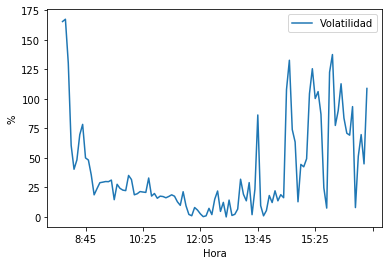

In [87]:
volat = np.absolute(np.log(dia['Potencia [kW]']).diff(12))
volat_df = pd.DataFrame({'Hora':dia.index,'Volatilidad':volat*100})
try:
    volat_df.set_index('Hora',inplace = True)
except:
    pass
volat_df.plot()
plt.ylabel('%')
np.var(volat)*100

Text(0, 0.5, 'Potencia [kW]')

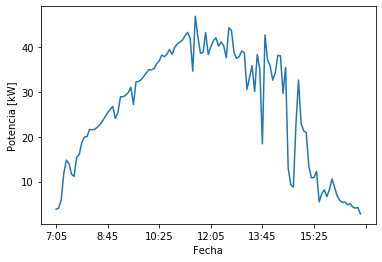

In [84]:
dia['Potencia [kW]'].plot()
plt.ylabel('Potencia [kW]')

In [74]:
dia.head(14)

,Fecha,Potencia [kW],K = 1,K = 3,K = 6,K = 12
85,7:05,3.83,3.18,NaN,NaN,NaN
86,7:10,4.06,3.83,NaN,NaN,NaN
87,7:15,5.86,4.06,3.18,NaN,NaN
88,7:20,11.84,5.86,3.83,NaN,NaN
89,7:25,14.80,11.84,4.06,NaN,NaN
90,7:30,14.03,14.80,5.86,3.18,NaN
91,7:35,11.72,14.03,11.84,3.83,NaN
92,7:40,11.16,11.72,14.80,4.06,NaN
93,7:45,15.41,11.16,14.03,5.86,NaN
94,7:50,16.12,15.41,11.72,11.84,NaN


In [70]:
N = len(dia['Potencia [kW]'])
mape = np.array([0.0]*4)
#dia['K = 1']
error1 = []

for i in range(85,204):
    error1.append(np.abs(dia['Potencia [kW]'][i]-dia['K = 1'][i])/dia['Potencia [kW]'][i])

mape[0] = sum(error1)/N*100
mape

array([14.08646909,  0.        ,  0.        ,  0.        ])

In [72]:
error3 = []
for i in range(87,204):
    error3.append(np.abs(dia['Potencia [kW]'][i]-dia['K = 3'][i])/dia['Potencia [kW]'][i])
mape[1] =  sum(error3)/N*100
mape

array([14.08646909, 24.4862743 ,  0.        ,  0.        ])

In [75]:
error6 = []
for i in range(90,204):
    error6.append(np.abs(dia['Potencia [kW]'][i]-dia['K = 6'][i])/dia['Potencia [kW]'][i])
mape[2] =  sum(error6)/N*100
mape

array([14.08646909, 24.4862743 , 33.73270954,  0.        ])

In [77]:
error12 = []
for i in range(96,204):
    error12.append(np.abs(dia['Potencia [kW]'][i]-dia['K = 12'][i])/dia['Potencia [kW]'][i])
mape[3] =  sum(error12)/N*100
mape

array([14.08646909, 24.4862743 , 33.73270954, 46.6481965 ])

In [78]:
for i in range(4):
    print('El mape para k =',i,'es:',mape[i])

El mape para k = 0 es: 14.086469085705708
El mape para k = 1 es: 24.48627429522582
El mape para k = 2 es: 33.73270954209821
El mape para k = 3 es: 46.64819649835333
